In [4]:
pip install folium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Interacting with Web APIs 

In [5]:
# Problem Statement: Analyzing Weather Data from OpenWeatherMap API 
# Dataset: Weather data retrieved from OpenWeatherMap API 
# Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data 
# for a specific location and perform data modeling and visualization to analyze weather 
# patterns over time. 
# Tasks to Perform: 

### 1. Register and obtain API key from OpenWeatherMap.
### 2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location. 

In [6]:
import requests

api_key = '18896d417b61718248835471bedf9b54'
location = 'Pune' 
url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'

response = requests.get(url)
weather_data = response.json()

# Display the retrieved weather data
print(weather_data)


{'coord': {'lon': 73.8553, 'lat': 18.5196}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.2, 'feels_like': 302.57, 'temp_min': 300.6, 'temp_max': 303.2, 'pressure': 1013, 'humidity': 37, 'sea_level': 1013, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 2.22, 'deg': 90, 'gust': 2.08}, 'clouds': {'all': 0}, 'dt': 1763109449, 'sys': {'type': 2, 'id': 2096426, 'country': 'IN', 'sunrise': 1763082642, 'sunset': 1763123249}, 'timezone': 19800, 'id': 1259229, 'name': 'Pune', 'cod': 200}


In [7]:
# Extract relevant weather attributes
temperature = weather_data['main']['temp'] - 273.15  # Convert from Kelvin to Celsius
humidity = weather_data['main']['humidity']
wind_speed = weather_data['wind']['speed']
weather_description = weather_data['weather'][0]['description']


### 3. Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response. 

In [8]:
print(f"Temperature: {temperature}°C")
print(f"Humidity: {humidity}%")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Weather Description: {weather_description}")

Temperature: 30.05000000000001°C
Humidity: 37%
Wind Speed: 2.22 m/s
Weather Description: clear sky


In [9]:
import pandas as pd
from datetime import datetime

# Example data collection over time
data = {
    'datetime': [datetime.now()],
    'temperature': [temperature],
    'humidity': [humidity],
    'wind_speed': [wind_speed],
    'weather_description': [weather_description]
}

df = pd.DataFrame(data)
print(f"Temperature: {temperature}°C")
print(f"Humidity: {humidity}%")
print(f"Wind Speed: {wind_speed} m/s")
print(f"Weather Description: {weather_description}")
df.head()

Temperature: 30.05000000000001°C
Humidity: 37%
Wind Speed: 2.22 m/s
Weather Description: clear sky


,datetime,temperature,humidity,wind_speed,weather_description
0,2025-11-14 14:20:01.723419,30.05,37,2.22,clear sky


In [10]:
# For example, calculating average values
average_temperature = df['temperature'].mean()
average_humidity = df['humidity'].mean()

print(f"Average Temperature: {average_temperature}°C")
print(f"Average Humidity: {average_humidity}%")

Average Temperature: 30.05000000000001°C
Average Humidity: 37.0%


### 4. Clean and preprocess the retrieved data, handling missing values or inconsistent formats.

In [11]:
df.isnull().sum()

datetime               0
temperature            0
humidity               0
wind_speed             0
weather_description    0
dtype: int64

In [12]:
df.dtypes

datetime               datetime64[ns]
temperature                   float64
humidity                        int64
wind_speed                    float64
weather_description            object
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["weather_description"] = encoder.fit_transform(df["weather_description"])
df["datetime"] = encoder.fit_transform(df["datetime"])

### 5. Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time. 

In [14]:
average_temp = df["temperature"].mean()  # Replace "Temperature" with your actual column name
print(f"Average Temperature: {average_temp:.2f}")  # Format to two decimal places


Average Temperature: 30.05


In [15]:
max_temp = df["temperature"].max()
min_temp = df["temperature"].min()

print(f"Maximum Temperature: {max_temp:.2f}")
print(f"Minimum Temperature: {min_temp:.2f}")


Maximum Temperature: 30.05
Minimum Temperature: 30.05


In [16]:
df["datetime"] = pd.to_datetime(df["datetime"])  # Assuming you have a "date" column

# Daily average temperature
daily_average_temp = df.resample("D", on="datetime")["temperature"].mean()  # Resample by day
print(daily_average_temp.head())  # Print first few days

# You can similarly calculate weekly, monthly, or yearly averages by changing "D" to "W", "M", or "Y" in resample


datetime
1970-01-01    30.05
Freq: D, Name: temperature, dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


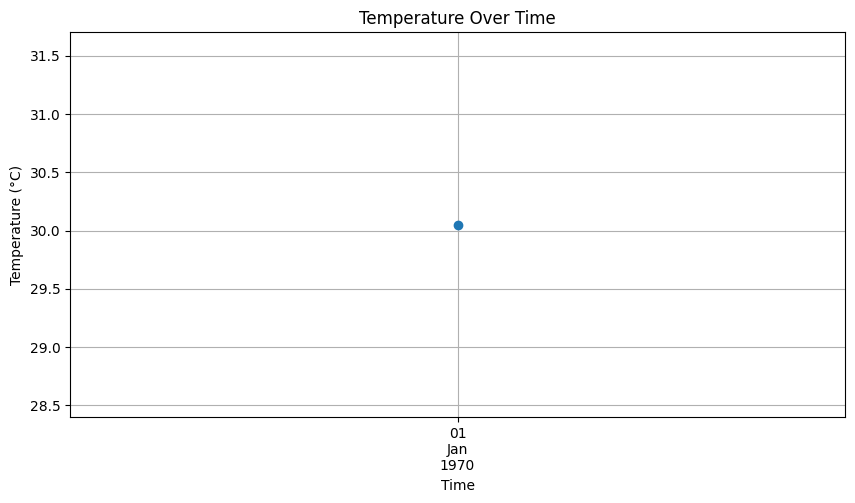

In [17]:
#trends over time
# Line chart for temperature over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
daily_average_temp.plot( marker='o',linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


### 6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent
### temperature changes, precipitation levels, or wind speed variations. 

In [18]:
df.columns


Index(['datetime', 'temperature', 'humidity', 'wind_speed',
       'weather_description'],
      dtype='object')

(array([-731., -549., -365., -184.,    0.,  181.,  365.,  546.,  730.]),
 [Text(-731.0, 0, '1968-01'),
  Text(-549.0, 0, '1968-07'),
  Text(-365.0, 0, '1969-01'),
  Text(-184.0, 0, '1969-07'),
  Text(0.0, 0, '1970-01'),
  Text(181.0, 0, '1970-07'),
  Text(365.0, 0, '1971-01'),
  Text(546.0, 0, '1971-07'),
  Text(730.0, 0, '1972-01')])

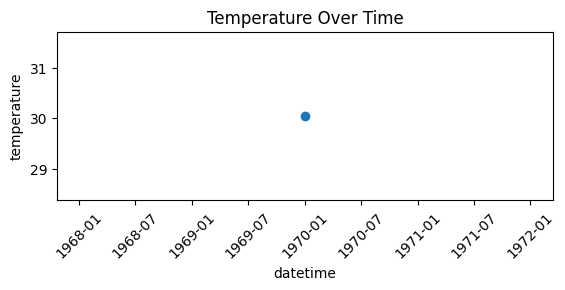

In [19]:
# Temperature Plot
plt.subplot(2, 1, 1)
plt.plot(df['datetime'], df['temperature'], marker='o', color='tab:blue')
plt.title('Temperature Over Time')
plt.xlabel('datetime')
plt.ylabel('temperature')
plt.xticks(rotation=45)



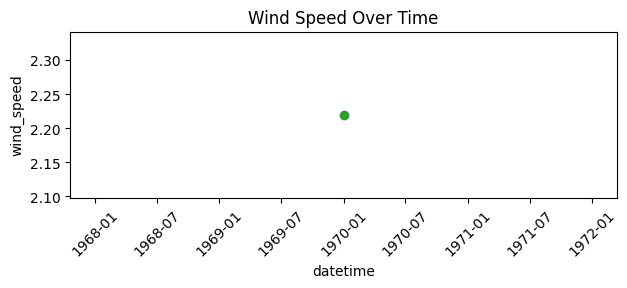

In [20]:
# Wind Speed Scatter Plot
plt.subplot(2, 1, 2)
plt.scatter(df['datetime'], df['wind_speed'], color='tab:green')
plt.title('Wind Speed Over Time')
plt.xlabel('datetime')
plt.ylabel('wind_speed')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 7. Apply data aggregation techniques to summarize weather statistics by specific time 
### periods (e.g., daily, monthly, seasonal). 

In [21]:
print(df.columns)


Index(['datetime', 'temperature', 'humidity', 'wind_speed',
       'weather_description'],
      dtype='object')


In [22]:
# Convert 'Date' to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])  


# Set 'Date' as the index
df.set_index('datetime', inplace=True)

# Resample and aggregate data
daily_summary = df.resample('D').agg({
    'temperature': ['mean', 'max', 'min'],
    'wind_speed': ['mean', 'max', 'min']
})

monthly_summary = df.resample('ME').agg({
    'temperature': ['mean', 'max', 'min'],
    'wind_speed': ['mean', 'max', 'min']
})

# Print the summary statistics
print("Daily Summary:\n", daily_summary)
print("\nMonthly Summary:\n", monthly_summary)





Daily Summary:
            temperature               wind_speed            
                  mean    max    min       mean   max   min
datetime                                                   
1970-01-01       30.05  30.05  30.05       2.22  2.22  2.22

Monthly Summary:
            temperature               wind_speed            
                  mean    max    min       mean   max   min
datetime                                                   
1970-01-31       30.05  30.05  30.05       2.22  2.22  2.22


(array([-731., -549., -365., -184.,    0.,  181.,  365.,  546.,  730.]),
 [Text(-731.0, 0, '1968-01'),
  Text(-549.0, 0, '1968-07'),
  Text(-365.0, 0, '1969-01'),
  Text(-184.0, 0, '1969-07'),
  Text(0.0, 0, '1970-01'),
  Text(181.0, 0, '1970-07'),
  Text(365.0, 0, '1971-01'),
  Text(546.0, 0, '1971-07'),
  Text(730.0, 0, '1972-01')])

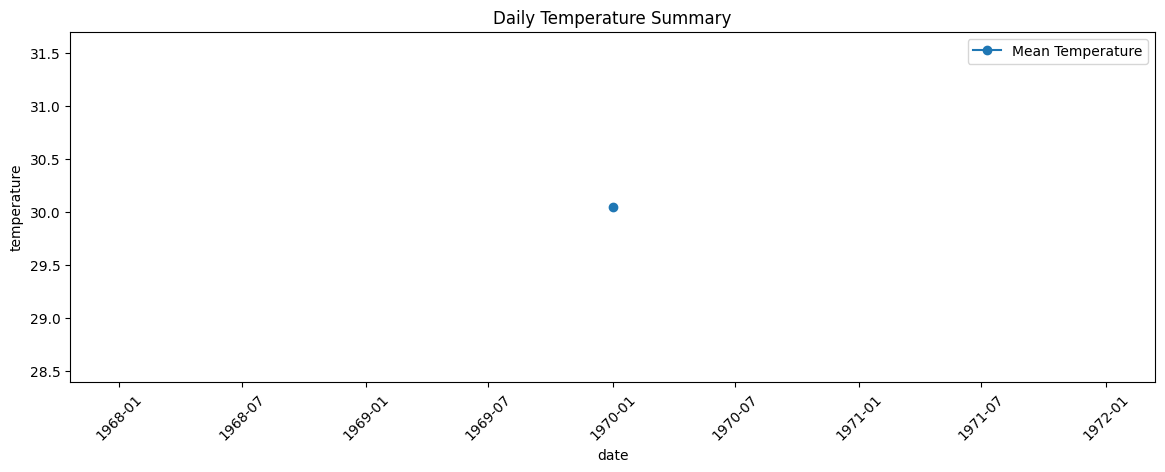

In [23]:
# Plot the aggregated data
plt.figure(figsize=(14, 10))

# Daily Temperature Summary
plt.subplot(2, 1, 1)
plt.plot(daily_summary.index, daily_summary[('temperature', 'mean')], marker='o', color='tab:blue', label='Mean Temperature')
plt.fill_between(daily_summary.index, daily_summary[('temperature', 'min')], daily_summary[('temperature', 'max')], color='tab:blue', alpha=0.2)
plt.title('Daily Temperature Summary')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.xticks(rotation=45)

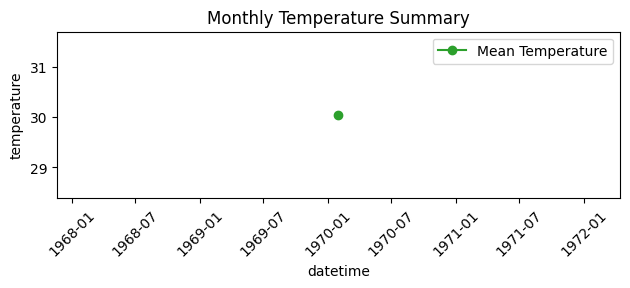

In [24]:
# Monthly Temperature Summary
plt.subplot(2, 1, 2)
plt.plot(monthly_summary.index, monthly_summary[('temperature', 'mean')], marker='o', color='tab:green', label='Mean Temperature')
plt.fill_between(monthly_summary.index, monthly_summary[('temperature', 'min')], monthly_summary[('temperature', 'max')], color='tab:green', alpha=0.2)
plt.title('Monthly Temperature Summary')
plt.xlabel('datetime')
plt.ylabel('temperature')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 8. Incorporate geographical information, if available, to create maps or geospatial 
### visualizations representing weather patterns across different locations. 

In [25]:
import requests
import pandas as pd
import folium

# Define a list of locations
locations = ['Pune', 'Mumbai', 'Delhi', 'Chennai', 'Kolkata']

# Fetch weather data for multiple locations
api_key = '18896d417b61718248835471bedf9b54'
weather_data = []

for location in locations:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'
    response = requests.get(url)
    data = response.json()
    weather_info = {
        'Location': location,
        'Latitude': data['coord']['lat'],
        'Longitude': data['coord']['lon'],
        'Temperature (C)': data['main']['temp'] - 273.15,
        'Wind Speed (m/s)': data['wind']['speed']
    }
    weather_data.append(weather_info)

# Print the raw weather data to debug
print("Weather Data:\n", weather_data)

# Create a DataFrame
df = pd.DataFrame(weather_data)

# Print the DataFrame to debug
print("\nDataFrame:\n", df)

# Create a map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers to the map
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"Location: {row['Location']}<br>"
            f"Temperature (C): {row['Temperature (C)']:.2f}<br>"
            f"Wind Speed (m/s): {row['Wind Speed (m/s)']:.2f}"
        ),
        tooltip=row['Location']
    ).add_to(m)

# Save the map to an HTML file
m.save('weather_map.html')

# Display the map
m


Weather Data:
 [{'Location': 'Pune', 'Latitude': 18.5196, 'Longitude': 73.8553, 'Temperature (C)': 30.05000000000001, 'Wind Speed (m/s)': 2.22}, {'Location': 'Mumbai', 'Latitude': 19.0144, 'Longitude': 72.8479, 'Temperature (C)': 31.99000000000001, 'Wind Speed (m/s)': 3.6}, {'Location': 'Delhi', 'Latitude': 28.6667, 'Longitude': 77.2167, 'Temperature (C)': 24.05000000000001, 'Wind Speed (m/s)': 3.09}, {'Location': 'Chennai', 'Latitude': 13.0878, 'Longitude': 80.2785, 'Temperature (C)': 30.03000000000003, 'Wind Speed (m/s)': 6.71}, {'Location': 'Kolkata', 'Latitude': 22.5697, 'Longitude': 88.3697, 'Temperature (C)': 27.970000000000027, 'Wind Speed (m/s)': 5.14}]

DataFrame:
   Location  Latitude  Longitude  Temperature (C)  Wind Speed (m/s)
0     Pune   18.5196    73.8553            30.05              2.22
1   Mumbai   19.0144    72.8479            31.99              3.60
2    Delhi   28.6667    77.2167            24.05              3.09
3  Chennai   13.0878    80.2785            30.03 

### 9. Explore and visualize relationships between weather attributes, such as temperature and humidity, 
### using correlation plots or heatmaps. 

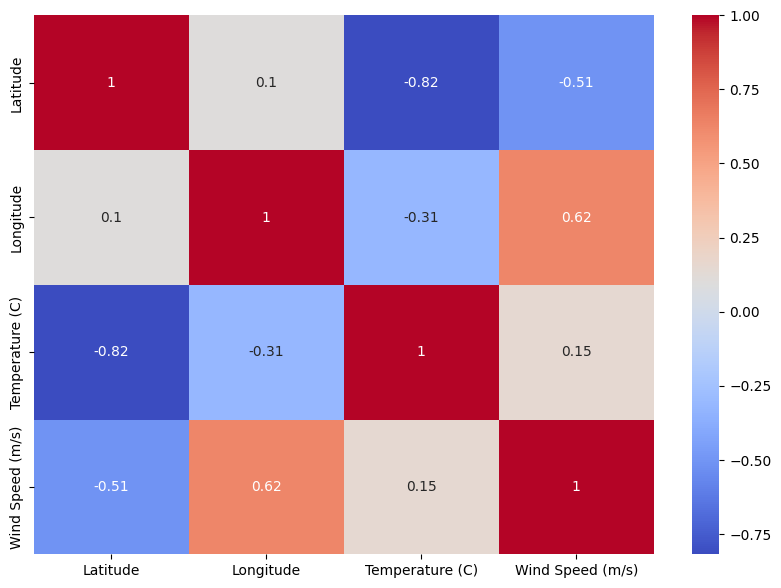

In [26]:
import seaborn as sns
## Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()